<a href="https://colab.research.google.com/github/OvinduWijethunge/Machine_Learning_Projects/blob/version-1/youtube%20spam%20classifier/Logistic_regression_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('models.csv')
#url = 'https://raw.githubusercontent.com/OvinduWijethunge/Machine_Learning_Projects/master/youtube%20spam%20classifier/model.csv'
#df = pd.read_csv(url)

In [3]:
df.head()

,Unnamed: 0,sim_content,sim_comment,word_count,duplicate_word_ratio,length_of_comment,stop_word_ratio,post_coment_gap,black_word_count,comment_duplication,...,num_of_punctuations_1.0,num_of_punctuations_2.0,num_of_punctuations_3.0,num_of_punctuations_4.0,num_of_punctuations_5.0,num_of_punctuations_6.0,is_period_sequence_1,is_link_1,is_youtube_link_1,is_number_1
0,0,-1.038590,-0.870409,1.866549,0.0000,4.274240,0.000000,13.337643,0.222222,0.0,...,0,0,0,0,0,0,0,0,0,0
1,1,-1.103307,-0.971247,1.866549,0.0000,4.555200,0.111111,29.017218,0.000000,0.0,...,0,1,0,0,0,0,0,0,0,0
2,2,-1.064844,-0.957045,2.260334,0.0625,5.086086,0.062500,29.017218,0.125000,0.0,...,0,0,0,1,0,0,0,1,1,0
3,3,-0.936203,-0.910982,1.683387,0.0000,3.982309,0.142857,29.017218,0.142857,0.0,...,0,0,0,0,0,0,0,0,0,0
4,4,-1.212501,-1.085031,2.122197,0.0000,4.920915,0.000000,29.017218,0.076923,0.0,...,0,0,0,1,0,0,1,1,1,0


In [4]:
df.isnull().sum()

Unnamed: 0                 0
sim_content                0
sim_comment                0
word_count                 0
duplicate_word_ratio       0
length_of_comment          0
stop_word_ratio            0
post_coment_gap            0
black_word_count           0
comment_duplication        0
is_spam                    0
no_of_sentences_2          0
no_of_sentences_3          0
num_of_punctuations_1.0    0
num_of_punctuations_2.0    0
num_of_punctuations_3.0    0
num_of_punctuations_4.0    0
num_of_punctuations_5.0    0
num_of_punctuations_6.0    0
is_period_sequence_1       0
is_link_1                  0
is_youtube_link_1          0
is_number_1                0
dtype: int64

In [5]:
df.rename(columns={'Unnamed: 0':'id'},inplace=True)
df.columns

Index(['id', 'sim_content', 'sim_comment', 'word_count',
       'duplicate_word_ratio', 'length_of_comment', 'stop_word_ratio',
       'post_coment_gap', 'black_word_count', 'comment_duplication', 'is_spam',
       'no_of_sentences_2', 'no_of_sentences_3', 'num_of_punctuations_1.0',
       'num_of_punctuations_2.0', 'num_of_punctuations_3.0',
       'num_of_punctuations_4.0', 'num_of_punctuations_5.0',
       'num_of_punctuations_6.0', 'is_period_sequence_1', 'is_link_1',
       'is_youtube_link_1', 'is_number_1'],
      dtype='object')

#### Standerdization is not required for logistic regression

In [6]:
dfc = df.copy()

In [7]:
y = dfc['is_spam']
X = dfc.drop(['is_spam','id'],axis=1)

#### Handle imbalnce dataset

In [8]:
dfc['is_spam'].value_counts()

0    6255
1     712
Name: is_spam, dtype: int64

In [9]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

os=RandomOverSampler(0.9)
X_ns,y_ns=os.fit_sample(X,y)
print("The number of classes before fit {}".format(Counter(y)))
print("The number of classes after fit {}".format(Counter(y_ns)))

X = X_ns
y = y_ns

The number of classes before fit Counter({0: 6255, 1: 712})
The number of classes after fit Counter({0: 6255, 1: 5629})


C:\Users\Acer\anaconda3\lib\site-packages\imblearn\utils\_validation.py:638: FutureWarning: Pass sampling_strategy=0.9 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  FutureWarning)


In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#### Hyperparameter Tuninng

In [11]:
from sklearn.linear_model import LogisticRegression

In [12]:
lr = LogisticRegression()

In [13]:
lr.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [14]:
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2','l1','elasticnet','none']
c_values = [100, 10, 1.0, 0.1, 0.01,0.001,0.0001]
dual = [True,False]
fit_intercept = [True,False]
warm_start = [True,False]

In [15]:
grid = dict(solver=solvers,penalty=penalty,C=c_values,dual=dual,fit_intercept=fit_intercept,warm_start=warm_start)

In [16]:
from sklearn.model_selection import StratifiedKFold
cv = StratifiedKFold(n_splits=10, shuffle=True) 

In [17]:
from sklearn.model_selection import RandomizedSearchCV
lr_random = RandomizedSearchCV(estimator=lr, param_distributions=grid, n_jobs=-1,n_iter = 100, cv=cv, scoring='accuracy',error_score=0,return_train_score=True,verbose=2)

In [18]:
lr_random.fit(X_train,y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=True),
                   error_score=0, estimator=LogisticRegression(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'C': [100, 10, 1.0, 0.1, 0.01, 0.001,
                                              0.0001],
                                        'dual': [True, False],
                                        'fit_intercept': [True, False],
                                        'penalty': ['l2', 'l1', 'elasticnet',
                                                    'none'],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear'],
                                        'warm_start': [True, False]},
                   return_train_score=True, scoring='accuracy', verbose=2)

### Evaluate

In [19]:
lr_random.best_estimator_

LogisticRegression(C=100, solver='liblinear')

In [20]:
lr_random.best_score_

0.8879524206239008

In [21]:
lr_random.best_params_

{'warm_start': False,
 'solver': 'liblinear',
 'penalty': 'l2',
 'fit_intercept': True,
 'dual': False,
 'C': 100}

In [22]:
# To get the best model
best_model = lr_random.best_estimator_

In [23]:
y_pred = best_model.predict(X_test)

In [24]:
err = (y_pred - y_test)

<AxesSubplot:>

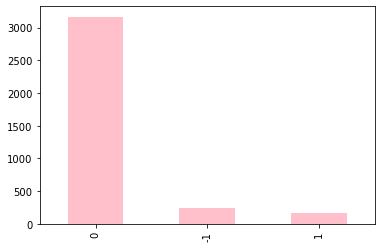

In [25]:
err.value_counts().plot(kind='bar',color='pink')

In [26]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test,y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 0.11217049915872125
MSE: 0.11217049915872125
RMSE: 0.3349186455823582


In [27]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1738  161]
 [ 239 1428]]
              precision    recall  f1-score   support

           0       0.88      0.92      0.90      1899
           1       0.90      0.86      0.88      1667

    accuracy                           0.89      3566
   macro avg       0.89      0.89      0.89      3566
weighted avg       0.89      0.89      0.89      3566



In [28]:
cof = lr_random.best_estimator_.coef_.tolist()

In [29]:
arr=cof[0]
x_ax = [abs(x) for x in arr]

In [30]:
x_ax

[0.6645127917577766,
 4.339870349815593,
 2.320021891021264,
 2.8014965750086236,
 2.3075665737032467,
 4.843565099990306,
 0.006761607055660957,
 15.536006994857702,
 5.118826659742805,
 0.38561202660815896,
 0.7803316787123711,
 0.2942594160464518,
 0.24224177809203803,
 0.027128616605497348,
 0.044174561257983996,
 0.23639056571898814,
 0.8573568180600868,
 0.485149490540662,
 4.265868580192342,
 0.32232622033699077,
 3.1211393721162177]

In [40]:
df.columns

Index(['id', 'sim_content', 'sim_comment', 'word_count',
       'duplicate_word_ratio', 'length_of_comment', 'stop_word_ratio',
       'post_coment_gap', 'black_word_count', 'comment_duplication', 'is_spam',
       'no_of_sentences_2', 'no_of_sentences_3', 'num_of_punctuations_1.0',
       'num_of_punctuations_2.0', 'num_of_punctuations_3.0',
       'num_of_punctuations_4.0', 'num_of_punctuations_5.0',
       'num_of_punctuations_6.0', 'is_period_sequence_1', 'is_link_1',
       'is_youtube_link_1', 'is_number_1'],
      dtype='object')

In [41]:
y_ax = ['sim_content', 'sim_comment', 'word_count',
       'duplicate_word_ratio', 'length_of_comment', 'stop_word_ratio',
       'post_coment_gap', 'black_word_count', 'comment_duplication',
       'no_of_sentences_2', 'no_of_sentences_3', 'num_of_punctuations_1.0',
       'num_of_punctuations_2.0', 'num_of_punctuations_3.0',
       'num_of_punctuations_4.0', 'num_of_punctuations_5.0',
       'num_of_punctuations_6.0', 'is_period_sequence_1', 'is_link_1',
       'is_youtube_link_1', 'is_number_1']

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


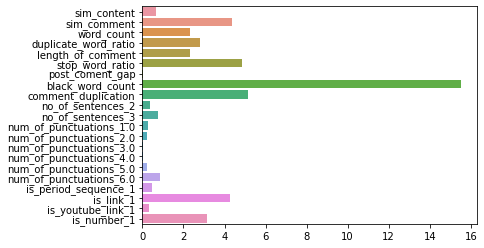

In [42]:
sns.barplot(x_ax,y_ax,orient = 'h')
#plt.xticks(rotation=90)
plt.show()

In [43]:
intercept = lr_random.best_estimator_.intercept_

In [44]:
intercept

array([-13.22917184])

In [ ]:
# best score is  0.8450704225352113

In [45]:
# get the best model in to instance (for save in disk)
best_model = lr_random.best_estimator_ 

In [ ]:
# for save the model if you want
#import pickle
# open a file, where you ant to store the data
#file = open('random_forest_regression_model_v2.pkl', 'wb')
# dump information to that file
#pickle.dump(rf_random, file)

### ROC 

In [46]:
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [47]:
baseline_roc_auc = roc_auc_score(y_test, best_model.predict(X_test))
fprB, tprB, thresholdsB = roc_curve(y_test, best_model.predict_proba(X_test)[:,1])

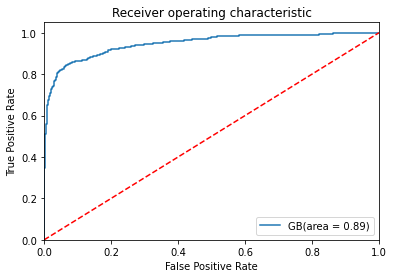

In [48]:
plt.figure()
plt.plot(fprB, tprB, label='GB(area = %0.2f)' % baseline_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

**Recall - presicion with threshold values**

(0.0, 1.0)

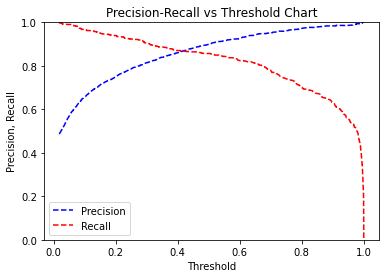

In [49]:
### Predict test_y values and probabilities based on random forest model
probs_y=best_model.predict_proba(X_test) 
  # probs_y is a 2-D array of probability of being labeled as 0 (first column of array) vs 1 (2nd column in array)

from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test, probs_y[:, 1]) 
   #retrieve probability of being 1(in second column of probs_y)
pr_auc = metrics.auc(recall, precision)

plt.title("Precision-Recall vs Threshold Chart")
plt.plot(thresholds, precision[: -1], "b--", label="Precision")
plt.plot(thresholds, recall[: -1], "r--", label="Recall")
plt.ylabel("Precision, Recall")
plt.xlabel("Threshold")
plt.legend(loc="lower left")
plt.ylim([0,1])

In [50]:
import pickle
#open a file, where you ant to store the data
file = open('logistic_Regressionv2.pkl', 'wb')
# dump information to that file
pickle.dump(best_model, file)
file.close()